Creating a simple signal with two frequency 

<ipython-input-1-88e1b35a5fe4>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='k' , LineWidth=2, label = 'Clean')


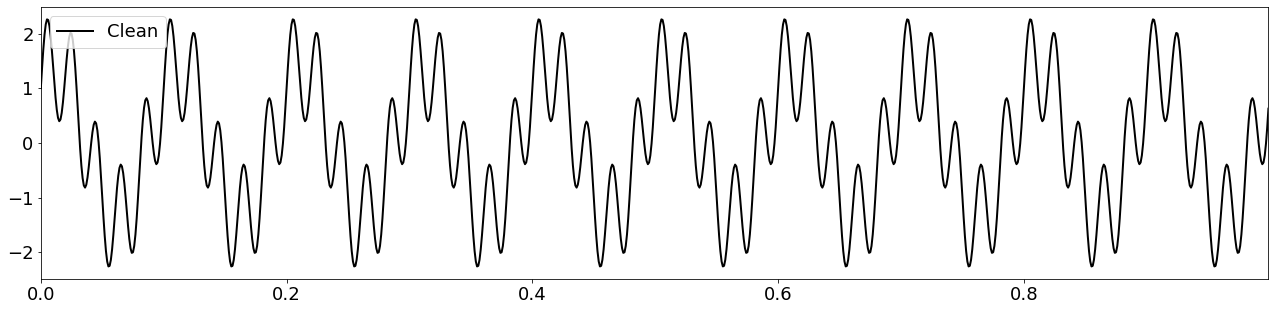

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[22,5]
plt.rcParams.update({'font.size' : 18})

dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t) + np.sin(2*np.pi*10*t) + np.cos(2*np.pi*10*t)     #Sum of 3 Frequencies
f_clean=f

plt.plot(t,f_clean,color='k' , LineWidth=2, label = 'Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

Adding noise to the signal 

<ipython-input-2-23cacbd8e918>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='red' , LineWidth=1.5, label = 'Noisy')
<ipython-input-2-23cacbd8e918>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean,color='black' , LineWidth=2, label = 'Clean')


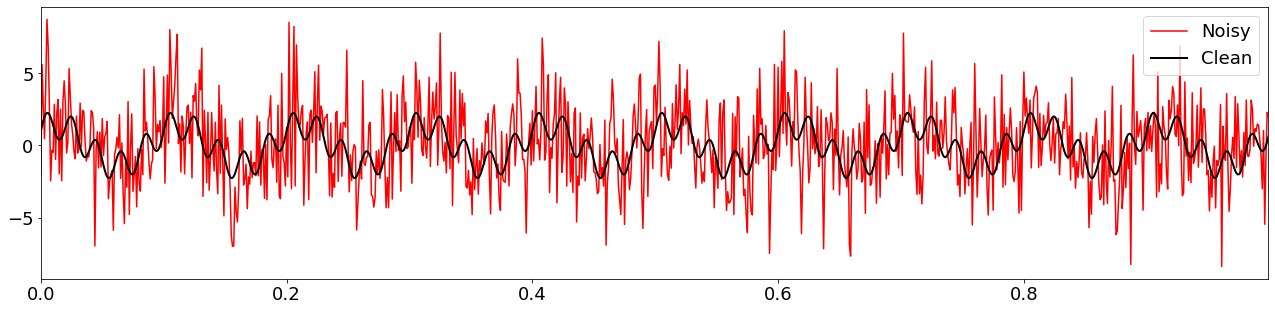

In [2]:
f=f+2.5*np.random.randn(len(t))

plt.plot(t,f,color='red' , LineWidth=1.5, label = 'Noisy')
plt.plot(t,f_clean,color='black' , LineWidth=2, label = 'Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

Taking FFT and calculating PSD

<ipython-input-3-35268fbfeb06>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color = 'red', LineWidth=1.5, label='Noisy')


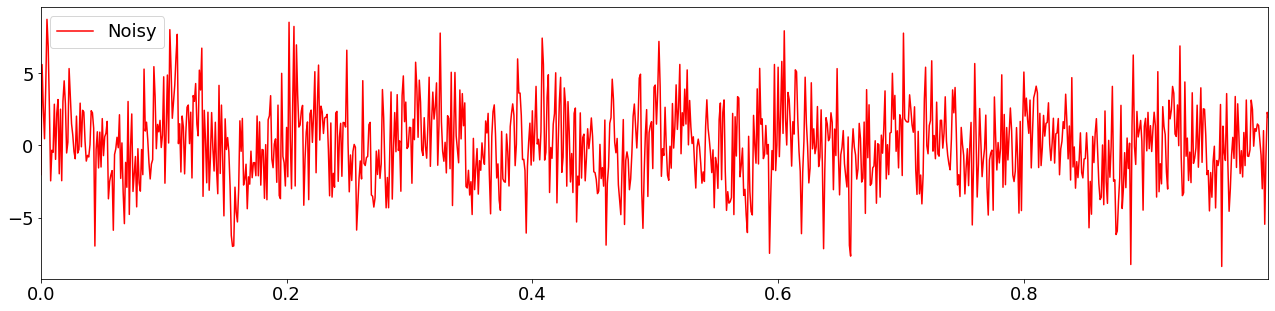

<ipython-input-3-35268fbfeb06>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='red',LineWidth=2,label='Noisy')
c:\users\karan\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


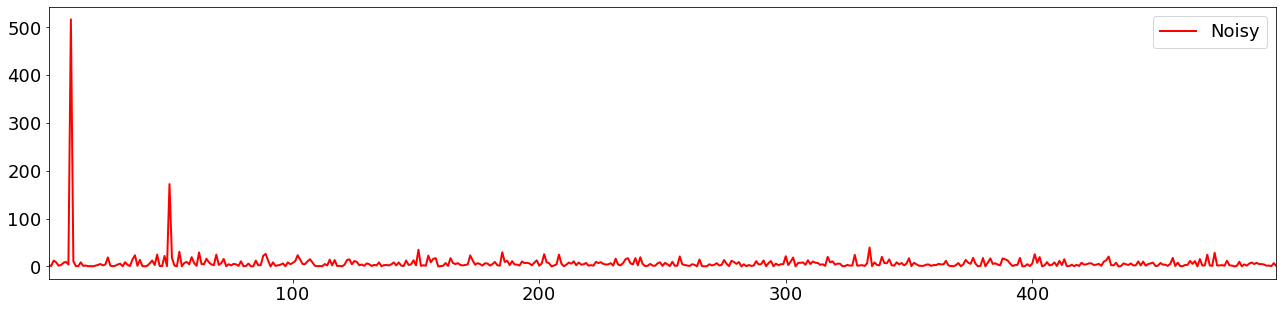

In [3]:
n = len(t)
fhat = np.fft.fft(f,n)                    # Taking FFT of f
PSD = fhat * np.conj(fhat) / n            # calculating PSD
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

plt.plot(t,f,color = 'red', LineWidth=1.5, label='Noisy')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()

plt.plot(freq[L],PSD[L],color='red',LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

Filtering

<ipython-input-4-374747b7c9cf>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='red',LineWidth=2,label='Noisy')
c:\users\karan\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


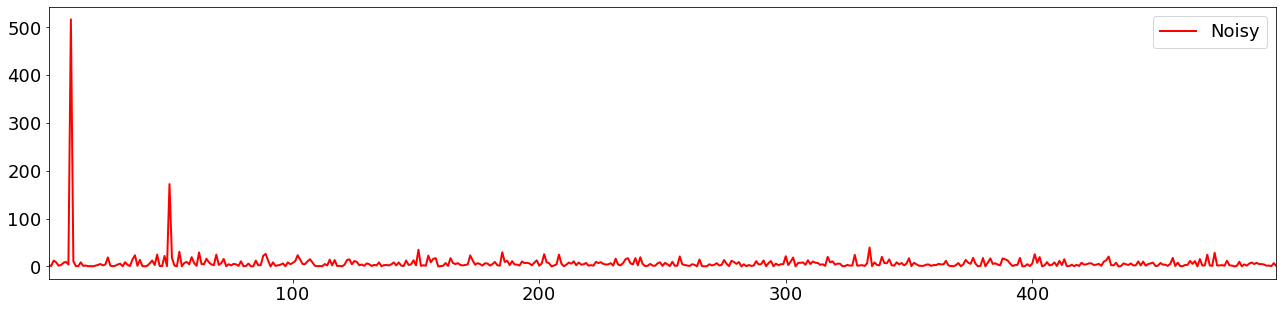

<ipython-input-4-374747b7c9cf>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSDclean[L],color='black',LineWidth=1.5,label='Filtered')
c:\users\karan\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


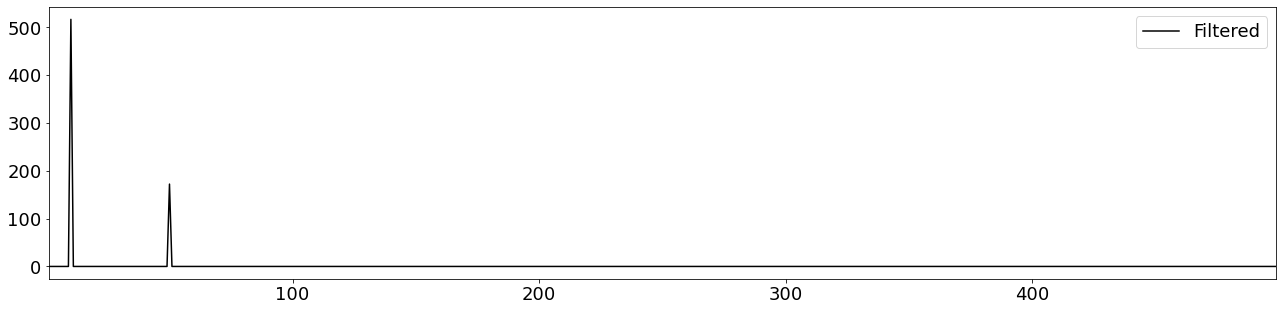

In [4]:
plt.plot(freq[L],PSD[L],color='red',LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

indices = PSD > 100                # Find all freqs with large powers
PSDclean = PSD * indices           # Zero out all other
fhat = indices * fhat              # zero out small Fourier coefs. in Y

#plt.plot(freq[L],PSD[L],color='red',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='black',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

Inverse FFT for Filtered time signal

<ipython-input-5-18f1db80034d>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ifft_noisy,color='black',LineWidth=2,label='Filtered')
c:\users\karan\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


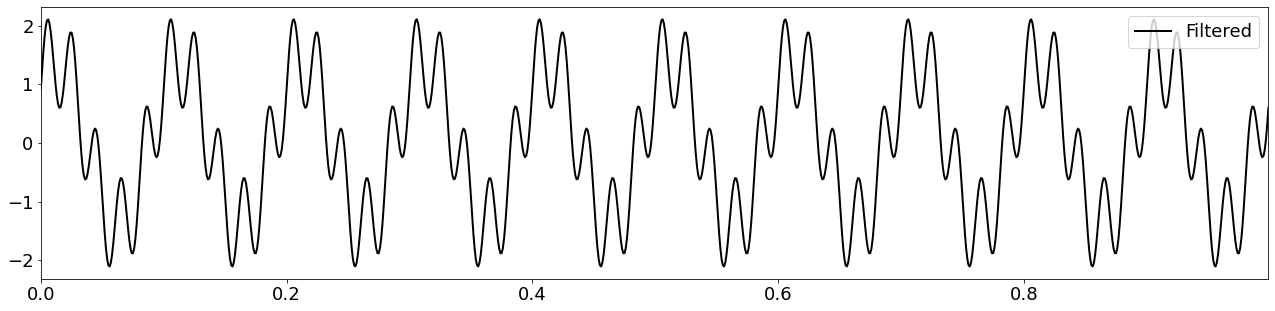

In [5]:
ifft_noisy=np.fft.ifft(fhat)
plt.plot(t,ifft_noisy,color='black',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()